In [1]:
import numpy as np
import pickle

In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
#         dict = pickle.load(fo) # for python 2 
        dict = pickle.load(fo, encoding='bytes')  # for python 3
    return dict

def load_train_data():
    '''
    loads training data: 50,000 examples with 3072 features
    '''
    X_train = None
    Y_train = None
    for i in range(1, 6):
        pickleFile = unpickle('cifar-10-batches-py/data_batch_{}'.format(i))
        dataX = pickleFile[b'data']
        dataY = pickleFile[b'labels']
        if type(X_train) is np.ndarray:
            X_train = np.concatenate((X_train, dataX))
            Y_train = np.concatenate((Y_train, dataY))
        else:
            X_train = dataX
            Y_train = dataY

    Y_train = Y_train.reshape(Y_train.shape[0], 1)

    return X_train.T, Y_train.T

def load_test_data():
    '''
    loads testing data: 10,000 examples with 3072 features
    '''
    X_test = None
    Y_test = None
    pickleFile = unpickle('cifar-10-batches-py/test_batch')
    dataX = pickleFile[b'data']
    dataY = pickleFile[b'labels']
    if type(X_test) is np.ndarray:
        X_test = np.concatenate((X_test, dataX))
        Y_test = np.concatenate((Y_test, dataY))
    else:
        X_test = np.array(dataX)
        Y_test = np.array(dataY)

    Y_test = Y_test.reshape(Y_test.shape[0], 1)

    return X_test.T, Y_test.T

In [11]:
X_train, Y_train = load_train_data()
X_test, Y_test = load_test_data()

In [12]:
Y_train = Y_train[0,:]
X_train = X_train.reshape((3,32,32,50000))
X_train = X_train.transpose((3,0,1,2))
print(X_train.shape,Y_train.shape)


Y_test = Y_test[0,:]
X_test = X_test.reshape((3,32,32,10000))
X_test = X_test.transpose((3,0,1,2))
print(X_test.shape,Y_test.shape)

(50000, 3, 32, 32) (50000,)
(10000, 3, 32, 32) (10000,)


In [ ]:
torch.Size([1000, 1, 28, 28])

In [9]:
def get_batch(X, y, batch_size,list_,counter):
    idx = list_[counter:counter+batch_size]
    X_batch = X[idx,:,:,:]
    y_batch = y[idx]
    return X_batch, y_batch

In [18]:
train_idx_epoch = list(range(Y_train.shape[0]))
np.random.shuffle(train_idx_epoch)  # you will have to do the train val split for the hw, here it is not done.
counter = 0
batch_size = 100
train_idx = []
epocs = 30
for i in range(epocs):
    np.random.shuffle(train_idx_epoch)
    train_idx.extend(train_idx_epoch)

In [33]:
for it in range(10): # shown for 10 iterations
    X_batch, Y_batch = get_batch( X_train, Y_train, batch_size,train_idx,counter)
    # X_batch input for pytorch
    print(X_batch.shape, Y_batch.size)
    counter += batch_size

(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100
(100, 3, 32, 32) 100


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

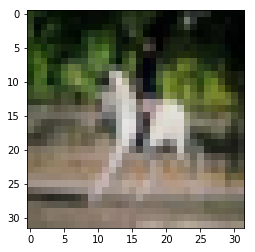

In [32]:
plt.imshow(X_batch[0,:,:,:].transpose((1,2,0)))